<a href="https://colab.research.google.com/github/sebiyang/-_team2/blob/main/%EC%9B%94%EA%B0%84%EA%B3%B5%EB%AA%A8%EC%A0%84_team2_220701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.9 MB/s 
     |████████████████████████████████| 133 kB 35.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e09ff1e21b5421dfeb14509165e35d6c6a10441e9cad0f64752020dd2848c85b
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
target = pd.read_excel('/content/drive/MyDrive/월간공모전 /0619/target.xlsx')
feature = pd.read_csv('/content/drive/MyDrive/월간공모전 /0619/features_2.csv')

In [6]:
print(target.shape)
print(feature.shape)

(264, 7)
(264, 10)


In [7]:
print(target.dtypes)
print(feature.dtypes)

기간           datetime64[ns]
한국 수출금액               int64
한국의대중국수출              int64
한국의대미국수출              int64
한국의대베트남수출             int64
한국의대홍콩수출              int64
한국의대일본수출              int64
dtype: object
변환             object
경상수지          float64
자본수지          float64
산업생산지수        float64
수출물가지수        float64
생산자물가지수       float64
수출물량지수        float64
수출금액지수        float64
KOSPI         float64
Unnamed: 9    float64
dtype: object


In [8]:
feature['변환'] = pd.to_datetime(feature['변환'])

In [9]:
feature

# 2000.01 ~ 2021.12 (264)

,변환,경상수지,자본수지,산업생산지수,수출물가지수,생산자물가지수,수출물량지수,수출금액지수,KOSPI,Unnamed: 9
0,2000-01-01,-218.1,-7.9,47.7,133.65,78.77,22.87,29.30,943.88,NaN
1,2000-02-01,-324.1,0.9,47.8,130.63,78.57,22.14,29.26,828.38,NaN
2,2000-03-01,275.3,1.0,48.4,129.60,78.52,25.97,33.59,860.94,NaN
3,2000-04-01,-1156.0,0.6,48.1,129.07,78.14,24.57,31.54,725.39,NaN
4,2000-05-01,1535.5,0.0,49.9,128.96,77.95,26.87,34.37,731.88,NaN
...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,7440.0,-18.4,115.7,110.14,110.86,116.46,127.68,3199.27,NaN
260,2021-09-01,10506.1,-9.8,112.8,110.61,111.27,122.37,134.93,3068.82,NaN
261,2021-10-01,8010.4,-4.8,113.2,111.79,112.43,120.48,134.03,2970.68,NaN
262,2021-11-01,6820.7,-40.9,115.0,110.74,113.23,126.27,140.46,2839.01,NaN


In [10]:
target

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


# 전처리 

In [11]:
feature=feature.drop('Unnamed: 9',axis=1)

In [12]:
#컬럼명 바꾸기 
target.columns = ['period', 'TotalExport', 'ChinaExport', 'USAExport', 'VietExport', 'HKExport', 'JapanExport']
target

,period,TotalExport,ChinaExport,USAExport,VietExport,HKExport,JapanExport
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [153]:
# 시계열 데이터로 바꾸기 
target['period'] = pd.to_datetime(target['period'])

target = target.drop(labels=range(0, 12), axis=0)
target.reset_index(inplace=True, drop=True)
target

# 2001.01 ~ 2021.12 (252)

,period,TotalExport,ChinaExport,USAExport,VietExport,HKExport,JapanExport
0,2002-01-01,11381879453,1471487338,2496356532,126243658,710914959,1054722674
1,2002-02-01,11023036912,1314887195,2267664325,118939281,658025209,1065870276
2,2002-03-01,13251322898,1776786999,2745682039,162112998,849361366,1194416507
3,2002-04-01,13184534346,1857224615,2754209141,197481812,843910378,1187275726
4,2002-05-01,14173176611,1941925212,2836154720,281202443,897000426,1282811471
...,...,...,...,...,...,...,...
235,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
236,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
237,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
238,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [154]:
target_total = target[['period','TotalExport']]
target_total

# 총 수출액만 타겟으로 설정

,period,TotalExport
0,2002-01-01,11381879453
1,2002-02-01,11023036912
2,2002-03-01,13251322898
3,2002-04-01,13184534346
4,2002-05-01,14173176611
...,...,...
235,2021-08-01,53165103786
236,2021-09-01,55913862375
237,2021-10-01,55660372637
238,2021-11-01,60330542263


In [155]:
target_total=target_total.set_index('period')

In [156]:
y_train =target_total 

In [157]:
y_train

,TotalExport
period,
2002-01-01,11381879453
2002-02-01,11023036912
2002-03-01,13251322898
2002-04-01,13184534346
2002-05-01,14173176611
...,...
2021-08-01,53165103786
2021-09-01,55913862375
2021-10-01,55660372637


#모델링 

###SARIMAX

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [158]:
y_train

,TotalExport
period,
2002-01-01,11381879453
2002-02-01,11023036912
2002-03-01,13251322898
2002-04-01,13184534346
2002-05-01,14173176611
...,...
2021-08-01,53165103786
2021-09-01,55913862375
2021-10-01,55660372637


In [159]:
adfuller(y_train.TotalExport) #두번째가 p value 임. 귀무가설 기각 불가! (0.05 가 기준)

(-1.449093903492563,
 0.5585269666117507,
 13,
 226,
 {'1%': -3.4596204846395824,
  '10%': -2.5736320761218576,
  '5%': -2.8744153028455948},
 10370.843832521381)

In [160]:
adfuller(y_train.TotalExport.diff().dropna()) #한번 차분하고 결측치 제거  #p-value 가 0에 가까운 값이 남 -> 1차 차분이 안정적이다! 

(-3.4910930142703003,
 0.008218812637096696,
 12,
 226,
 {'1%': -3.4596204846395824,
  '10%': -2.5736320761218576,
  '5%': -2.8744153028455948},
 10325.676614995677)

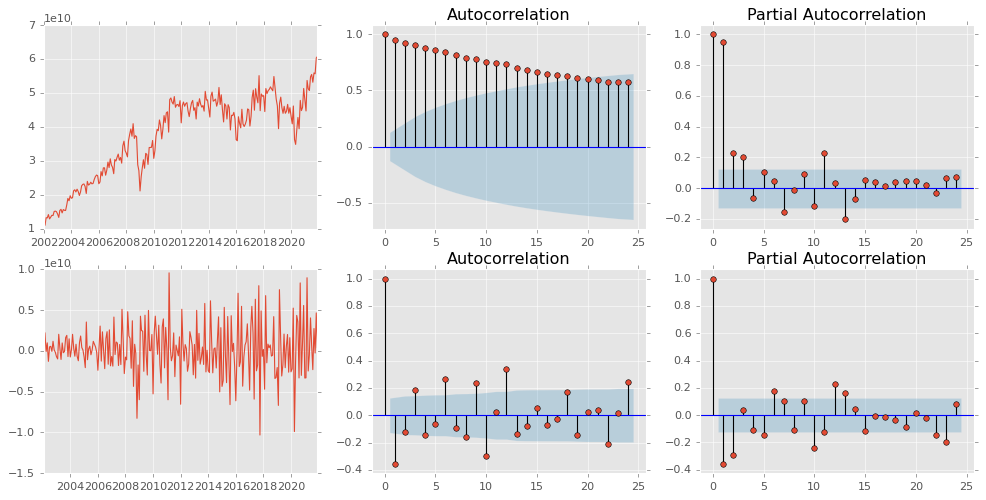

In [161]:
# 2*3 subplot

figure, axes = plt.subplots(2,3, figsize=(15,7))
axes[0,0].plot(y_train.TotalExport)
axes[1,0].plot(y_train.TotalExport.diff())
plot_acf(y_train.TotalExport, axes[0,1])
plot_pacf(y_train.TotalExport, axes[0,2])
plot_acf(y_train.TotalExport.diff().dropna(), axes[1,1])
plot_pacf(y_train.TotalExport.diff().dropna(), axes[1,2])
plt.show()

In [162]:
#ARIMA 의 차수는 (2,1,2)

model = ARIMA(y_train.TotalExport, order=(2,1,2))
model_fit = model.fit(trend = 'nc') #not constant
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.TotalExport   No. Observations:                  239
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5541.457
Method:                       css-mle   S.D. of innovations     2838215783.729
Date:                Sat, 02 Jul 2022   AIC                          11092.914
Time:                        17:26:55   BIC                          11110.296
Sample:                    02-01-2002   HQIC                         11099.919
                         - 12-01-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ar.L1.D.TotalExport    -0.6286      0.199     -3.160      0.002      -1.018      -0.239
ar.L2.D.TotalExport    -0.3067      0.201     -1.524      0.129      -0.701       0.088
ma.L1.D.TotalExp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [163]:
from itertools import product

In [36]:
#총 7개의 파라미터가 존재한다. trend에 대한 부분(p,d,q)과 seasonal에 대한 부분(P,D,Q,m)으로 나뉜다.
#p : pacf에서 수렴하기 직전값. ( =2 )
#d : adf테스트 및 추세의 가시적 확인으로 추세여부 확인( =1 )
#q : acf에서 수렴하기 직전값 ( =1 )
#P : pacf에서 계절성이 주기가 몇 번 반복 됐는지 확인 ( =3 )
#D : 계절성이 있는지 확인하고 계절성 차분의 필요성에 따라 1 or 0 ( =1 )
#Q : acf기준 계절성 주기가 몇 번 반복 됐는지 확인 ( =3 )
#m : 계절성 주기 ( =24 )

In [169]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [170]:
import itertools

p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [171]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      tmp_mdl = SARIMAX(y_train,
                                          exog = None,
                                          order = param,
                                          seasonal_order = param_seasonal,
                                          enforce_stationarity = True,
                                          enforce_invertibility = True)
      res = tmp_mdl.fit()
      print("SARIMAX{}x{}12 - AIC:{}".format(param,param_seasonal,res.aic))
      if res.aic < best_aic:
        best_aic = res.aic
        best_pdq = param
        best_seasonal_pdq = param_seasonal
        best_mdl = tmp_mdl

    except:
      continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq,best_seasonal_pdq,best_aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8.867537528783262e+18
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12269.266613717646
SARIMAX(0, 0, 0)x(0, 0, 2, 12)12 - AIC:12266.351538190345
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:253557.268237054


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10906.229016269072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(0, 1, 2, 12)12 - AIC:10908.135478631631


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(0, 2, 0, 12)12 - AIC:317381.58975825994


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 0, 0)x(0, 2, 1, 12)12 - AIC:10384.333986412621


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(0, 2, 2, 12)12 - AIC:10377.813097898452
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11523.574196962609


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:11523.460673624062


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 0, 2, 12)12 - AIC:11523.193158112497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10905.107456986203


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10906.28781989331


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10908.242842899099


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 2, 0, 12)12 - AIC:10445.877265535253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 2, 1, 12)12 - AIC:10377.142686750027


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(1, 2, 2, 12)12 - AIC:10381.534181598512


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 0, 0, 12)12 - AIC:11524.261854371078


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 0, 1, 12)12 - AIC:11522.320821255089


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 0, 2, 12)12 - AIC:11522.148314202863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 1, 0, 12)12 - AIC:10904.977530995071


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 1, 1, 12)12 - AIC:10904.789572484064


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10885.780644017705


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 2, 0, 12)12 - AIC:10375.022439099144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 2, 1, 12)12 - AIC:10325.002600123757


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10319.154204904502
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12226.175534822061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12195.53713245481


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 0, 2, 12)12 - AIC:12189.876613064676
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10812.235049293886


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:10809.658645007541


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 1, 2, 12)12 - AIC:10811.605677470632
SARIMAX(0, 0, 1)x(0, 2, 0, 12)12 - AIC:10412.960234808566


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 2, 1, 12)12 - AIC:10336.60862595519


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(0, 2, 2, 12)12 - AIC:10325.888620252295
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:12179.118805234511


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12179.211919248708


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 0, 2, 12)12 - AIC:12181.07579080455


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10810.143732707802


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10811.646074555778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10812.332155019185


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 2, 0, 12)12 - AIC:10377.12672239226


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 2, 1, 12)12 - AIC:10333.372034240956


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10327.222565232509


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 0, 0, 12)12 - AIC:12179.966787777015


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 0, 1, 12)12 - AIC:12181.05834855693


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 0, 2, 12)12 - AIC:12183.051459156979


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 1, 0, 12)12 - AIC:10810.4201848495


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10810.984963765653


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 1, 2, 12)12 - AIC:10809.262404593515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 2, 0, 12)12 - AIC:10343.14056940814


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10325.777770050698


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 1)x(2, 2, 2, 12)12 - AIC:10326.925783501434
SARIMAX(0, 0, 2)x(0, 0, 0, 12)12 - AIC:12191.887113397712


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 0, 1, 12)12 - AIC:12185.262075209112


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 0, 2, 12)12 - AIC:12184.91408015214
SARIMAX(0, 0, 2)x(0, 1, 0, 12)12 - AIC:10770.453514315363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 1, 1, 12)12 - AIC:10766.440652633177


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 1, 2, 12)12 - AIC:10768.34926774594


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 2, 0, 12)12 - AIC:10372.224921269377


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 2, 1, 12)12 - AIC:10301.317111379922


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10291.674993902598
SARIMAX(0, 0, 2)x(1, 0, 0, 12)12 - AIC:12180.293936853624


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 0, 1, 12)12 - AIC:12180.560035104907


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 0, 2, 12)12 - AIC:12182.432392975981


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 1, 0, 12)12 - AIC:10767.691975858492


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 1, 1, 12)12 - AIC:10768.410000321292


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 1, 2, 12)12 - AIC:10769.581674854468


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 2, 0, 12)12 - AIC:10337.786260358562


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 2, 1, 12)12 - AIC:10298.578612613972


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(1, 2, 2, 12)12 - AIC:10292.902209619717


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 0, 0, 12)12 - AIC:12181.350311751426


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 0, 1, 12)12 - AIC:12182.417264492635


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 0, 2, 12)12 - AIC:12184.411088647848


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10766.307592373529


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 1, 1, 12)12 - AIC:10767.945893557659


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 1, 2, 12)12 - AIC:10768.592315435879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10309.315632015267


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 2, 1, 12)12 - AIC:10291.84597578433


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 0, 2)x(2, 2, 2, 12)12 - AIC:10292.579353847203
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:nan
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:11121.788484392408


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 0, 2, 12)12 - AIC:11130.95543377379
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:nan


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:10544.466644433694


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 1, 2, 12)12 - AIC:10551.310414174513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 2, 0, 12)12 - AIC:364010.51232266315


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 2, 1, 12)12 - AIC:10150.420581140643


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(0, 2, 2, 12)12 - AIC:10133.151662643057
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:11110.359027046907


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:11088.650868071152


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 0, 2, 12)12 - AIC:11097.032899693333


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:10590.966987390588


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:10544.580317169866


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 1, 2, 12)12 - AIC:10544.358253108909


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 2, 0, 12)12 - AIC:10211.917541609786


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 2, 1, 12)12 - AIC:10109.849552374744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(1, 2, 2, 12)12 - AIC:10086.098319845614


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 0, 0, 12)12 - AIC:11106.829980528553


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 0, 1, 12)12 - AIC:11090.217185049783


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 0, 2, 12)12 - AIC:11095.893383135479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 1, 0, 12)12 - AIC:10558.327985329226


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 1, 1, 12)12 - AIC:10537.063379281037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10539.583748887722


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 2, 0, 12)12 - AIC:10134.582236959075


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 2, 1, 12)12 - AIC:10076.29850287976


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 0)x(2, 2, 2, 12)12 - AIC:10056.148795237983
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:11096.38797065823
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:11075.96524241517


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 0, 2, 12)12 - AIC:11075.213752350512
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:10594.866341564299


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:10513.329488339941


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 1, 2, 12)12 - AIC:10515.329474784781


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 2, 0, 12)12 - AIC:10264.88579208198


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 2, 1, 12)12 - AIC:10146.18271021985


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(0, 2, 2, 12)12 - AIC:10122.5057208629
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:11070.237659665896


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:11049.46027401294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 0, 2, 12)12 - AIC:11051.459913136623


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:10551.559004743838


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:10515.329479055454


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10516.106477910998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 2, 0, 12)12 - AIC:10188.34857139126


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 2, 1, 12)12 - AIC:10132.372066524635


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(1, 2, 2, 12)12 - AIC:10124.458530863052


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 0, 0, 12)12 - AIC:11066.811737276097


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 0, 1, 12)12 - AIC:11051.4600241353


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 0, 2, 12)12 - AIC:11052.012553661549


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 1, 0, 12)12 - AIC:10526.840497602469


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10514.695599416744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 1, 2, 12)12 - AIC:10516.498575102496


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 2, 0, 12)12 - AIC:10148.269615161205


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 2, 1, 12)12 - AIC:10125.859749917843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 1)x(2, 2, 2, 12)12 - AIC:10125.86750302957
SARIMAX(0, 1, 2)x(0, 0, 0, 12)12 - AIC:11098.275517654994


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 0, 1, 12)12 - AIC:11077.97543434743


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 0, 2, 12)12 - AIC:11076.873674189781
SARIMAX(0, 1, 2)x(0, 1, 0, 12)12 - AIC:10591.337707027546


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 1, 1, 12)12 - AIC:10511.87898202856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10513.867145449192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 2, 0, 12)12 - AIC:10262.242122613381


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 2, 1, 12)12 - AIC:10144.957258049757


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10121.223567143785
SARIMAX(0, 1, 2)x(1, 0, 0, 12)12 - AIC:11071.549502061542


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 0, 1, 12)12 - AIC:11049.23920043318


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 0, 2, 12)12 - AIC:11051.21523291168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 1, 0, 12)12 - AIC:10546.748701435272


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 1, 1, 12)12 - AIC:10513.87084015257


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 1, 2, 12)12 - AIC:10514.705815151297


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 2, 0, 12)12 - AIC:10185.311850366386


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 2, 1, 12)12 - AIC:10130.508732279955


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(1, 2, 2, 12)12 - AIC:10123.10729207378


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 0, 0, 12)12 - AIC:11066.742732758323


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 0, 1, 12)12 - AIC:11051.222603508759


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 0, 2, 12)12 - AIC:11052.02234854735


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10522.774218946073


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 1, 1, 12)12 - AIC:10513.447345819948


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 1, 2, 12)12 - AIC:10514.995057306936


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10143.649235383764


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 2, 1, 12)12 - AIC:10123.868968379173


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 1, 2)x(2, 2, 2, 12)12 - AIC:10124.559706275133
SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:4.726102340358437e+24


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:11317.467384582553


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:11326.623845683775
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:234306.3918286533


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:10748.701281408808


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:10764.113490594355


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 2, 0, 12)12 - AIC:nan
SARIMAX(0, 2, 0)x(0, 2, 1, 12)12 - AIC:10364.739830589417


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(0, 2, 2, 12)12 - AIC:10367.420526469574
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:11308.289767953713


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:11290.434759214202


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:11302.24882443782
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:10785.166825590393


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:10739.190465031235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:10745.163220274251


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 2, 0, 12)12 - AIC:10391.009238453302


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 2, 1, 12)12 - AIC:10301.875124464255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(1, 2, 2, 12)12 - AIC:10296.113572557406


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:11307.015197399553


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:11291.692299430782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:11301.21798235544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:10754.298890091151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:10729.437133719031


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10735.959523955822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 2, 0, 12)12 - AIC:10316.035916303857


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 2, 1, 12)12 - AIC:10259.268752471788


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10255.583616512864
SARIMAX(0, 2, 1)x(0, 0, 0, 12)12 - AIC:11107.890296718695


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 0, 1, 12)12 - AIC:11093.990770090342


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 0, 2, 12)12 - AIC:11093.604118508812


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 1, 0, 12)12 - AIC:10605.20699412466


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 1, 1, 12)12 - AIC:10544.334866757195


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 1, 2, 12)12 - AIC:10546.300463529104


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 2, 0, 12)12 - AIC:10277.18664218152


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 2, 1, 12)12 - AIC:10190.60637914102


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(0, 2, 2, 12)12 - AIC:10173.317014009515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 0, 0, 12)12 - AIC:11089.820873553552


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 0, 1, 12)12 - AIC:11074.461180748345


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 0, 2, 12)12 - AIC:11076.46056667932


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 1, 0, 12)12 - AIC:10573.148670316266


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 1, 1, 12)12 - AIC:10546.311231477564


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 1, 2, 12)12 - AIC:10547.381171397945


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 2, 0, 12)12 - AIC:10218.58978564971


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 2, 1, 12)12 - AIC:10180.214863729168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(1, 2, 2, 12)12 - AIC:10175.282392694458


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 0, 0, 12)12 - AIC:11087.773955340737


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 0, 1, 12)12 - AIC:11076.460722151058


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 0, 2, 12)12 - AIC:11077.364226986781


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 1, 0, 12)12 - AIC:10556.204583824772


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 1, 1, 12)12 - AIC:10546.342501521844


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 1, 2, 12)12 - AIC:10548.088937375753


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 2, 0, 12)12 - AIC:10189.975949276475


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 2, 1, 12)12 - AIC:10176.413568873519


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 1)x(2, 2, 2, 12)12 - AIC:10176.982971276771
SARIMAX(0, 2, 2)x(0, 0, 0, 12)12 - AIC:11072.23135908292


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 0, 1, 12)12 - AIC:11058.214118210504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 0, 2, 12)12 - AIC:11057.992139119062


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 1, 0, 12)12 - AIC:10557.03049903312


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 1, 1, 12)12 - AIC:10495.899433834365


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 1, 2, 12)12 - AIC:10497.89856256823


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 2, 0, 12)12 - AIC:10227.831904477836


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 2, 1, 12)12 - AIC:10140.527999538155


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10122.32622843753


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 0, 0, 12)12 - AIC:11053.847406141762


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 0, 1, 12)12 - AIC:11039.987170736207


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 0, 2, 12)12 - AIC:11041.987191222284


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 1, 0, 12)12 - AIC:10524.711255888138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 1, 1, 12)12 - AIC:10497.898842461083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 1, 2, 12)12 - AIC:10498.959324203852


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 2, 0, 12)12 - AIC:10170.989906215682


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 2, 1, 12)12 - AIC:10129.57238288895


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(1, 2, 2, 12)12 - AIC:10124.253946583336


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 0, 0, 12)12 - AIC:11051.623000827181


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 0, 1, 12)12 - AIC:11041.987163459871


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 0, 2, 12)12 - AIC:11043.056036889771


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 1, 0, 12)12 - AIC:10506.136605081796


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 1, 1, 12)12 - AIC:10497.739866491396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 1, 2, 12)12 - AIC:10499.606154958681


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10140.810701507558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 2, 1, 12)12 - AIC:10124.944759627771


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(0, 2, 2)x(2, 2, 2, 12)12 - AIC:10125.84350945755
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:11189.661794248452


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:11169.386106920998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 0, 2, 12)12 - AIC:11168.08510507657
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:10671.95588042718


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:10600.042134294945


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 1, 2, 12)12 - AIC:10601.606955689185
SARIMAX(1, 0, 0)x(0, 2, 0, 12)12 - AIC:10329.963403593098


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 2, 1, 12)12 - AIC:10210.62844982055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(0, 2, 2, 12)12 - AIC:10187.922341590674
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:11163.29400090262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:11136.544943755205


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 0, 2, 12)12 - AIC:11138.54440974624


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:10632.708478094617


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:10601.7433132517


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10603.204022435444


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 2, 0, 12)12 - AIC:10255.443143827604


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 2, 1, 12)12 - AIC:10198.395747302682


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10189.921199666009


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 0, 0, 12)12 - AIC:11159.360387773662


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 0, 1, 12)12 - AIC:11138.544557651405


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 0, 2, 12)12 - AIC:11139.236296504278


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 1, 0, 12)12 - AIC:10612.546645032407


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10601.11679700543


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 1, 2, 12)12 - AIC:10602.79259055301


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 2, 0, 12)12 - AIC:10214.851466793118


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10191.772658157006


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 0)x(2, 2, 2, 12)12 - AIC:10191.289650165287
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:11146.666316528248


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:11123.90724072566


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 0, 2, 12)12 - AIC:11123.273210836647


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:10646.006865110034


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:10564.375316326066


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 1, 2, 12)12 - AIC:10565.907406459592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 2, 0, 12)12 - AIC:10307.104927446282


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 2, 1, 12)12 - AIC:10185.036487186291


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(0, 2, 2, 12)12 - AIC:10161.593928627859


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:11117.477873599913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:11092.424922106627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 0, 2, 12)12 - AIC:11094.412333070952


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:10601.367612649748


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10566.053619324357


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 1, 2, 12)12 - AIC:10567.809319336011


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 2, 0, 12)12 - AIC:10228.973889071207


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 2, 1, 12)12 - AIC:10172.00025855752


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(1, 2, 2, 12)12 - AIC:10163.583770932553


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 0, 0, 12)12 - AIC:11113.668592226075


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 0, 1, 12)12 - AIC:11094.416331570017


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 0, 2, 12)12 - AIC:11094.743878378104


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 1, 0, 12)12 - AIC:10576.733894921705


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 1, 1, 12)12 - AIC:10565.4294536946


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 1, 2, 12)12 - AIC:10567.246492049926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10188.271443687554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 2, 1, 12)12 - AIC:10164.845022293368


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 1)x(2, 2, 2, 12)12 - AIC:10164.810528082313
SARIMAX(1, 0, 2)x(0, 0, 0, 12)12 - AIC:11148.69441702329


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 0, 1, 12)12 - AIC:11126.73081737167


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 0, 2, 12)12 - AIC:11125.787356340792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 1, 0, 12)12 - AIC:10641.050047342222


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 1, 1, 12)12 - AIC:10563.897745772916


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 1, 2, 12)12 - AIC:10565.264716866515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 2, 0, 12)12 - AIC:10302.137438940554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 2, 1, 12)12 - AIC:10182.634488534099


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(0, 2, 2, 12)12 - AIC:10159.368014146978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 0, 0, 12)12 - AIC:11119.586513492735


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 0, 1, 12)12 - AIC:11093.213176490784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 0, 2, 12)12 - AIC:11095.20762582311


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 1, 0, 12)12 - AIC:10596.35232285265


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 1, 1, 12)12 - AIC:10565.460013042673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 1, 2, 12)12 - AIC:10564.79894084872


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 2, 0, 12)12 - AIC:10224.466622301366


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 2, 1, 12)12 - AIC:10169.15586243298


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(1, 2, 2, 12)12 - AIC:10161.318745492146


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 0, 0, 12)12 - AIC:11114.253832480968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 0, 1, 12)12 - AIC:11095.209369652926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 0, 2, 12)12 - AIC:11095.796509740625


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 1, 0, 12)12 - AIC:10573.125918005533


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 1, 1, 12)12 - AIC:10565.01071563701


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 1, 2, 12)12 - AIC:10566.589537353797


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 2, 0, 12)12 - AIC:10182.242562869335


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 2, 1, 12)12 - AIC:10161.909090093654


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 0, 2)x(2, 2, 2, 12)12 - AIC:10162.593249011172
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:11108.33998100927
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:11083.661927560628


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(0, 0, 2, 12)12 - AIC:11081.723504739384
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:10591.924368100137


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:10510.611310204386


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(0, 1, 2, 12)12 - AIC:10512.60967256458
SARIMAX(1, 1, 0)x(0, 2, 0, 12)12 - AIC:10262.090218643563


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(0, 2, 1, 12)12 - AIC:10141.606559888343


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(0, 2, 2, 12)12 - AIC:10117.185880135738
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:11075.646801416398


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:11052.176019378516


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 0, 2, 12)12 - AIC:11054.163739817479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:10548.269241873299


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:10512.610221397723


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10513.416102173283


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 2, 0, 12)12 - AIC:10184.676220851701


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 2, 1, 12)12 - AIC:10127.40285827688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10119.134633771346


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 0, 0, 12)12 - AIC:11070.491773219372


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 0, 1, 12)12 - AIC:11054.16770959792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 0, 2, 12)12 - AIC:11055.050212025359


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 1, 0, 12)12 - AIC:10523.181829784837


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10511.646493743094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 1, 2, 12)12 - AIC:10513.518224304898


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 2, 0, 12)12 - AIC:10143.517265954513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10120.601469746947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 0)x(2, 2, 2, 12)12 - AIC:10120.494160094124
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:11098.288264070055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:11077.816399334217


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 0, 2, 12)12 - AIC:11076.821233681627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:10592.153855647146


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:10511.366765362643


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10513.365093316897


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 2, 0, 12)12 - AIC:10262.08594321076


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 2, 1, 12)12 - AIC:10142.83252451747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10118.86384050505
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:11071.55962498239


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:11049.657999296915


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 0, 2, 12)12 - AIC:11051.65391506098


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:10548.289771947582


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10513.365631742276


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 1, 2, 12)12 - AIC:10514.18502406017


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 2, 0, 12)12 - AIC:10185.036726579963


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10128.753601190332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(1, 2, 2, 12)12 - AIC:10120.805119476316


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 0, 0, 12)12 - AIC:11067.312675027373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 0, 1, 12)12 - AIC:11051.655190768877


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 0, 2, 12)12 - AIC:11052.368461711045


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10523.533344444297


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 1, 1, 12)12 - AIC:10512.667984561751


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 1, 2, 12)12 - AIC:10514.43544006058


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10144.212030380713


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 2, 1, 12)12 - AIC:10122.01324033397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 1)x(2, 2, 2, 12)12 - AIC:10122.177557353252
SARIMAX(1, 1, 2)x(0, 0, 0, 12)12 - AIC:11097.66305866183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 0, 1, 12)12 - AIC:11078.37107226953


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 0, 2, 12)12 - AIC:11079.078245515884
SARIMAX(1, 1, 2)x(0, 1, 0, 12)12 - AIC:10593.319379296769


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 1, 1, 12)12 - AIC:10513.861430281413


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 1, 2, 12)12 - AIC:10515.849773138127


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 2, 0, 12)12 - AIC:10264.074381027182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 2, 1, 12)12 - AIC:10146.820399399618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(0, 2, 2, 12)12 - AIC:10123.061927023879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 0, 0, 12)12 - AIC:11072.222210539938


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 0, 1, 12)12 - AIC:11050.224326164935


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 0, 2, 12)12 - AIC:11052.202878728418


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 1, 0, 12)12 - AIC:10548.422001506247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 1, 1, 12)12 - AIC:10515.853673136828


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 1, 2, 12)12 - AIC:10516.67451233568


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 2, 0, 12)12 - AIC:10186.810423558934


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 2, 1, 12)12 - AIC:10132.214967182634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(1, 2, 2, 12)12 - AIC:10124.943806150217


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 0, 0, 12)12 - AIC:11067.184823999749


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 0, 1, 12)12 - AIC:11052.209213563507


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 0, 2, 12)12 - AIC:11052.953561524278


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 1, 0, 12)12 - AIC:10524.74056891532


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 1, 1, 12)12 - AIC:10515.438405257595


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 1, 2, 12)12 - AIC:10516.988928223289


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 2, 0, 12)12 - AIC:10145.065161103397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 2, 1, 12)12 - AIC:10125.686888388916


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 1, 2)x(2, 2, 2, 12)12 - AIC:10126.401361347169
SARIMAX(1, 2, 0)x(0, 0, 0, 12)12 - AIC:11229.59226629738


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 0, 1, 12)12 - AIC:11199.773665931043


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 0, 2, 12)12 - AIC:11197.550655883751
SARIMAX(1, 2, 0)x(0, 1, 0, 12)12 - AIC:10690.915850057116


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 1, 1, 12)12 - AIC:10609.410736113601


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 1, 2, 12)12 - AIC:10611.370614956235
SARIMAX(1, 2, 0)x(0, 2, 0, 12)12 - AIC:10350.719110049959


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 2, 1, 12)12 - AIC:10231.367899605844


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(0, 2, 2, 12)12 - AIC:10206.868766544216
SARIMAX(1, 2, 0)x(1, 0, 0, 12)12 - AIC:11189.67360418566


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 0, 1, 12)12 - AIC:11164.242466740303


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 0, 2, 12)12 - AIC:11166.240001827211


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 1, 0, 12)12 - AIC:10650.258591531036


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 1, 1, 12)12 - AIC:10611.386425395885


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 1, 2, 12)12 - AIC:10612.421125813486


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 2, 0, 12)12 - AIC:10275.288195046265


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 2, 1, 12)12 - AIC:10218.4069017354


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10208.862541622224


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 0, 0, 12)12 - AIC:11184.833886029544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 0, 1, 12)12 - AIC:11166.240938249968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 0, 2, 12)12 - AIC:11167.208231839519


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 1, 0, 12)12 - AIC:10624.97409467556


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 1, 1, 12)12 - AIC:10609.177212316517


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 1, 2, 12)12 - AIC:10607.838199853868


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 2, 0, 12)12 - AIC:10237.155241200951


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10211.579845114182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 0)x(2, 2, 2, 12)12 - AIC:10209.983588155275
SARIMAX(1, 2, 1)x(0, 0, 0, 12)12 - AIC:11087.52782911931


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 0, 1, 12)12 - AIC:11071.404924374077


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 0, 2, 12)12 - AIC:11070.542171250183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 1, 0, 12)12 - AIC:10555.577390341645


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 1, 1, 12)12 - AIC:10498.399652905107


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 1, 2, 12)12 - AIC:10500.395765088066


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 2, 0, 12)12 - AIC:10226.19572027231


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 2, 1, 12)12 - AIC:10141.23229657381


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10123.794229098006


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 0, 0, 12)12 - AIC:11065.726870593136


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 - AIC:11051.224332971455


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 0, 2, 12)12 - AIC:11053.220740640136


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 1, 0, 12)12 - AIC:10524.964471042476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 1, 1, 12)12 - AIC:10500.397089257312


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 1, 2, 12)12 - AIC:10501.50382213886


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 2, 0, 12)12 - AIC:10170.794799936819


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 2, 1, 12)12 - AIC:10131.056600693923


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(1, 2, 2, 12)12 - AIC:10125.749231226182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 0, 0, 12)12 - AIC:11062.669501375192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 0, 1, 12)12 - AIC:11053.221850235335


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 0, 2, 12)12 - AIC:11054.502728171188


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 1, 0, 12)12 - AIC:10507.194847968347


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 1, 1, 12)12 - AIC:10500.078870656473


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 1, 2, 12)12 - AIC:10501.983299706575


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 2, 0, 12)12 - AIC:10141.040787978138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 2, 1, 12)12 - AIC:10126.334782460253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 1)x(2, 2, 2, 12)12 - AIC:10127.221498505862
SARIMAX(1, 2, 2)x(0, 0, 0, 12)12 - AIC:11071.16145489856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 0, 1, 12)12 - AIC:11056.664141100653


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 0, 2, 12)12 - AIC:11056.234330937637


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 1, 0, 12)12 - AIC:10551.375456754216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 1, 1, 12)12 - AIC:10488.41100156564


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 1, 2, 12)12 - AIC:10490.41065787281


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 2, 0, 12)12 - AIC:10221.009353568157


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 2, 1, 12)12 - AIC:10125.544625415754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(0, 2, 2, 12)12 - AIC:10105.580894325987


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 0, 0, 12)12 - AIC:11051.812633466949


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 0, 1, 12)12 - AIC:11036.285940309008


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 0, 2, 12)12 - AIC:11038.280624153329


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 1, 0, 12)12 - AIC:10517.541938688188


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 1, 1, 12)12 - AIC:10490.410774051325


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 1, 2, 12)12 - AIC:10491.384431281478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 2, 0, 12)12 - AIC:10159.173067154627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 2, 1, 12)12 - AIC:10113.722745691477


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(1, 2, 2, 12)12 - AIC:10107.51391370816


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 0, 0, 12)12 - AIC:11048.79966057076


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 0, 1, 12)12 - AIC:11038.282086260875


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 0, 2, 12)12 - AIC:11039.397639412344


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 1, 0, 12)12 - AIC:10497.90318334955


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 1, 1, 12)12 - AIC:10490.06322251396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 1, 2, 12)12 - AIC:10491.880638602795


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 2, 0, 12)12 - AIC:10125.64056755144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 2, 1, 12)12 - AIC:10108.226146179779


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(1, 2, 2)x(2, 2, 2, 12)12 - AIC:10109.004457745305
SARIMAX(2, 0, 0)x(0, 0, 0, 12)12 - AIC:11160.717765556576


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 0, 1, 12)12 - AIC:11133.738512947926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 0, 2, 12)12 - AIC:11131.787980903635
SARIMAX(2, 0, 0)x(0, 1, 0, 12)12 - AIC:10641.406286707606


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 1, 1, 12)12 - AIC:10562.77458614228


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10564.199817215565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 2, 0, 12)12 - AIC:10301.39432264666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 2, 1, 12)12 - AIC:10178.953219489382


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10155.247609872162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 0, 0, 12)12 - AIC:11124.569107769998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 0, 1, 12)12 - AIC:11096.571486207247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 0, 2, 12)12 - AIC:11098.571289924355


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 1, 0, 12)12 - AIC:10597.692509331151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 1, 1, 12)12 - AIC:10564.390595223747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 1, 2, 12)12 - AIC:10566.266823844155


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 2, 0, 12)12 - AIC:10223.536316222835


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 2, 1, 12)12 - AIC:10165.90338581667


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(1, 2, 2, 12)12 - AIC:10157.239130281407


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 0, 0, 12)12 - AIC:11118.806733909005


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 0, 1, 12)12 - AIC:11098.57151486974


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 0, 2, 12)12 - AIC:11099.24888364372


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10573.514662256504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 1, 1, 12)12 - AIC:10563.449236360279


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 1, 2, 12)12 - AIC:10565.331193160706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10182.227745689077


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 2, 1, 12)12 - AIC:10158.531960704937


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 0)x(2, 2, 2, 12)12 - AIC:10158.4107880161
SARIMAX(2, 0, 1)x(0, 0, 0, 12)12 - AIC:11148.62412761505


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 0, 1, 12)12 - AIC:11125.20090503633


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 0, 2, 12)12 - AIC:11124.231018060096


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 1, 0, 12)12 - AIC:10642.909904524691


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 1, 1, 12)12 - AIC:10563.416545977143


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 1, 2, 12)12 - AIC:10564.859886921757


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 2, 0, 12)12 - AIC:10303.181888534953


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10181.436473250735


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(0, 2, 2, 12)12 - AIC:10157.899300385325


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 0, 0, 12)12 - AIC:11117.889294033876


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 0, 1, 12)12 - AIC:11090.434567875483


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 0, 2, 12)12 - AIC:11092.433474909045


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 1, 0, 12)12 - AIC:10598.619327378026


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 1, 1, 12)12 - AIC:10565.036341286308


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 1, 2, 12)12 - AIC:10566.89401908645


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10225.311424764557


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 2, 1, 12)12 - AIC:10168.295741221737


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(1, 2, 2, 12)12 - AIC:10159.885004013817


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 0, 0, 12)12 - AIC:11112.869058987879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 0, 1, 12)12 - AIC:11092.43383017671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 0, 2, 12)12 - AIC:11092.844172457877


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 1, 0, 12)12 - AIC:10574.186267404813


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 1, 1, 12)12 - AIC:10564.360297562183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 1, 2, 12)12 - AIC:10566.129825250635


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 2, 0, 12)12 - AIC:10184.147617778268


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 2, 1, 12)12 - AIC:10160.964934358639


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 1)x(2, 2, 2, 12)12 - AIC:10161.07438132531


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 0, 0, 12)12 - AIC:11147.457862721087


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 0, 1, 12)12 - AIC:11126.166714365021


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 0, 2, 12)12 - AIC:11125.51508146744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 1, 0, 12)12 - AIC:10637.211864960911


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 1, 1, 12)12 - AIC:10565.850473515784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 1, 2, 12)12 - AIC:10567.2173840434


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10279.011695134275


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 2, 1, 12)12 - AIC:10182.112561610002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(0, 2, 2, 12)12 - AIC:10161.313357849505


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 0, 0, 12)12 - AIC:11119.670846732879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 0, 1, 12)12 - AIC:11095.857932268613


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 0, 2, 12)12 - AIC:11097.829669443887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 1, 0, 12)12 - AIC:10596.895203933727


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 1, 1, 12)12 - AIC:10567.41265793794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 1, 2, 12)12 - AIC:10569.312953250996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 2, 0, 12)12 - AIC:10215.894934701242


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 2, 1, 12)12 - AIC:10170.120341367634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(1, 2, 2, 12)12 - AIC:10163.260966066959


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 0, 0, 12)12 - AIC:11115.930557675085


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 0, 1, 12)12 - AIC:11097.839028844432


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 0, 2, 12)12 - AIC:11098.088905443423


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 1, 0, 12)12 - AIC:10575.020010769902


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 1, 1, 12)12 - AIC:10566.934577823966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 1, 2, 12)12 - AIC:10568.538986118963


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 2, 0, 12)12 - AIC:10182.107311503882


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 2, 1, 12)12 - AIC:10163.768978381659


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 0, 2)x(2, 2, 2, 12)12 - AIC:10164.574671298782
SARIMAX(2, 1, 0)x(0, 0, 0, 12)12 - AIC:11093.719270342006
SARIMAX(2, 1, 0)x(0, 0, 1, 12)12 - AIC:11074.519449350573


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 0, 2, 12)12 - AIC:11072.980195778087
SARIMAX(2, 1, 0)x(0, 1, 0, 12)12 - AIC:10591.700586375659


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 1, 1, 12)12 - AIC:10509.810345018417


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10511.804194541673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 2, 0, 12)12 - AIC:10262.002416173267


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 2, 1, 12)12 - AIC:10141.414891972292


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10117.112354326728
SARIMAX(2, 1, 0)x(1, 0, 0, 12)12 - AIC:11068.093207913902


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 0, 1, 12)12 - AIC:11044.890271716748


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 0, 2, 12)12 - AIC:11046.86981527476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 1, 0, 12)12 - AIC:10546.595371012412


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 1, 1, 12)12 - AIC:10511.806111036278


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 1, 2, 12)12 - AIC:10512.59890482072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 2, 0, 12)12 - AIC:10183.588215420888


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 2, 1, 12)12 - AIC:10126.911509751091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(1, 2, 2, 12)12 - AIC:10119.033973322257


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 0, 0, 12)12 - AIC:11063.015731349007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 0, 1, 12)12 - AIC:11046.875973134338


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 0, 2, 12)12 - AIC:11047.430623798318


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10521.616128842776


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 1, 1, 12)12 - AIC:10511.265345607648


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 1, 2, 12)12 - AIC:10512.89646245431


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10141.745969489524


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 2, 1, 12)12 - AIC:10120.037798847861


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 0)x(2, 2, 2, 12)12 - AIC:10120.418021148533
SARIMAX(2, 1, 1)x(0, 0, 0, 12)12 - AIC:11094.844558538294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 0, 1, 12)12 - AIC:11076.367773438953


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 0, 2, 12)12 - AIC:11074.573045957255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 1, 0, 12)12 - AIC:10593.303661853559


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 1, 1, 12)12 - AIC:10510.693190206151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 1, 2, 12)12 - AIC:10512.673592183663


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 2, 0, 12)12 - AIC:10264.008467018495


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 2, 1, 12)12 - AIC:10144.427545993489


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(0, 2, 2, 12)12 - AIC:10119.105424654066


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 0, 0, 12)12 - AIC:11069.872086928635


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 0, 1, 12)12 - AIC:11046.136233871934


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 0, 2, 12)12 - AIC:11048.040418577606


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 1, 0, 12)12 - AIC:10543.231489341051


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 1, 1, 12)12 - AIC:10512.680149022362


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 1, 2, 12)12 - AIC:10513.52707206269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 2, 0, 12)12 - AIC:10185.847468821532


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 2, 1, 12)12 - AIC:10128.10970405471


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(1, 2, 2, 12)12 - AIC:10121.01612939317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 0, 0, 12)12 - AIC:11064.185369857138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 0, 1, 12)12 - AIC:11048.069144087782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 0, 2, 12)12 - AIC:11048.70894373182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 1, 0, 12)12 - AIC:10521.150091010168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 1, 1, 12)12 - AIC:10512.188068472382


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 1, 2, 12)12 - AIC:10513.80059636583


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 2, 0, 12)12 - AIC:10143.152870715072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 2, 1, 12)12 - AIC:10122.129708725108


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 1)x(2, 2, 2, 12)12 - AIC:10122.475989659832


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 0, 0, 12)12 - AIC:11091.152787763716


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 0, 1, 12)12 - AIC:11078.766415368773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 0, 2, 12)12 - AIC:11076.685332846666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 1, 0, 12)12 - AIC:10595.105975329363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 1, 1, 12)12 - AIC:10514.109949463287


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 1, 2, 12)12 - AIC:10515.939570226343


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 2, 0, 12)12 - AIC:10266.063928612264


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 2, 1, 12)12 - AIC:10148.743274925198


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(0, 2, 2, 12)12 - AIC:10124.320143815548


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 0, 0, 12)12 - AIC:11072.239695322103


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 0, 1, 12)12 - AIC:11048.045104357832


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 0, 2, 12)12 - AIC:11049.75303907565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 1, 0, 12)12 - AIC:10548.645975256833


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 1, 1, 12)12 - AIC:10515.993484180082


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 1, 2, 12)12 - AIC:10516.587673503134


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 2, 0, 12)12 - AIC:10188.903777475032


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 2, 1, 12)12 - AIC:10133.613718982277


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(1, 2, 2, 12)12 - AIC:10126.054893695295


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 0, 0, 12)12 - AIC:11065.687624725015


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 0, 1, 12)12 - AIC:11049.839872663173


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 0, 2, 12)12 - AIC:11050.786085867421


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 1, 0, 12)12 - AIC:10523.311168378397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 1, 1, 12)12 - AIC:10515.664891963881


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 1, 2, 12)12 - AIC:10516.76947958334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 2, 0, 12)12 - AIC:10145.616856198636


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 2, 1, 12)12 - AIC:10126.37118832946


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 1, 2)x(2, 2, 2, 12)12 - AIC:10127.378858013555
SARIMAX(2, 2, 0)x(0, 0, 0, 12)12 - AIC:11141.826919705345


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 0, 1, 12)12 - AIC:11122.879055520747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 0, 2, 12)12 - AIC:11116.594036601098
SARIMAX(2, 2, 0)x(0, 1, 0, 12)12 - AIC:10629.04051480592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 1, 1, 12)12 - AIC:10541.390194229069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 1, 2, 12)12 - AIC:10542.182179366162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 2, 0, 12)12 - AIC:10299.268810516078


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 2, 1, 12)12 - AIC:10176.626393729544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10149.699970286245


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 0, 0, 12)12 - AIC:11113.211308119478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 0, 1, 12)12 - AIC:11082.10512493338


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 0, 2, 12)12 - AIC:11082.508161223323


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 1, 0, 12)12 - AIC:10573.609127243042


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 1, 1, 12)12 - AIC:10542.543124047072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 1, 2, 12)12 - AIC:10542.296302419538


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 2, 0, 12)12 - AIC:10214.630237636173


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 2, 1, 12)12 - AIC:10159.08392639671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(1, 2, 2, 12)12 - AIC:10151.127690460773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 0, 0, 12)12 - AIC:11100.42906415346


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 0, 1, 12)12 - AIC:11082.99317709855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 0, 2, 12)12 - AIC:11085.037438610296


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 1, 0, 12)12 - AIC:10546.780084362164


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 1, 1, 12)12 - AIC:10542.105566345832


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 1, 2, 12)12 - AIC:10541.872785126328


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 2, 0, 12)12 - AIC:10167.521059817773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 2, 1, 12)12 - AIC:10150.863676963792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 0)x(2, 2, 2, 12)12 - AIC:10152.290454081132
SARIMAX(2, 2, 1)x(0, 0, 0, 12)12 - AIC:11068.801855730102


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 0, 1, 12)12 - AIC:11056.532170648019


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 0, 2, 12)12 - AIC:11055.862914924593


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 1, 0, 12)12 - AIC:10554.318151720061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 1, 1, 12)12 - AIC:10496.119564861716


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 1, 2, 12)12 - AIC:10498.110512425947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 2, 0, 12)12 - AIC:10226.044907133602


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10141.402041349247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(0, 2, 2, 12)12 - AIC:10123.695375589603


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 0, 0, 12)12 - AIC:11052.009507761602


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 0, 1, 12)12 - AIC:11037.326213850567


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 0, 2, 12)12 - AIC:11039.310101212777


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 1, 0, 12)12 - AIC:10522.423690193438


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 1, 1, 12)12 - AIC:10498.113374558714


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 1, 2, 12)12 - AIC:10499.195288524792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10170.401386364321


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 2, 1, 12)12 - AIC:10130.477645170538


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(1, 2, 2, 12)12 - AIC:10125.56853831502


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 0, 0, 12)12 - AIC:11048.865302587765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 0, 1, 12)12 - AIC:11039.31460197493


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 0, 2, 12)12 - AIC:11040.429838850816


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 1, 0, 12)12 - AIC:10504.478525160339


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:10498.123524495402


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:10499.825673558425


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 2, 0, 12)12 - AIC:10139.859082879339


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 2, 1, 12)12 - AIC:10125.696976637764


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 1)x(2, 2, 2, 12)12 - AIC:10127.100720133712


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:11062.604852890276


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:11048.17657809773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:11046.754388643334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:10540.102220853161


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:10481.54966400411


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:10483.539895530084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 2, 0, 12)12 - AIC:10204.49031605709


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 2, 1, 12)12 - AIC:10115.932686401666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(0, 2, 2, 12)12 - AIC:10096.85585241269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:11043.770330938205


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:11023.90850567208


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:11025.851730747963


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:10508.919809584193


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:10483.54331951648


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:10484.45118669209


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 2, 0, 12)12 - AIC:10146.259391028223


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 2, 1, 12)12 - AIC:10104.948053155429


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(1, 2, 2, 12)12 - AIC:10098.776816371637


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:11038.290325430182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:11025.870173244195


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 0, 2, 12)12 - AIC:11026.92522619061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:10490.207544255172


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 1, 1, 12)12 - AIC:10483.180441546843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 1, 2, 12)12 - AIC:10484.872772143797


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 2, 0, 12)12 - AIC:10115.597752486214


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 2, 1, 12)12 - AIC:10099.60013249117


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMAX(2, 2, 2)x(2, 2, 2, 12)12 - AIC:10100.275290451616
Best SARIMAX(0, 1, 0)x(2, 2, 2, 12)12 model - AIC:10056.148795237983


In [39]:
mdl = SARIMAX(endog = y_train, order = (2,2,2),
              seasonal_order= (2,1,1,12),
              enforce_stationarity=True,
              enforce_invertibility=True)

res = mdl.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        TotalExport   No. Observations:                  251
Model:             SARIMAX(2, 2, 2)x(2, 1, 1, 12)   Log Likelihood               -5482.567
Date:                            Sat, 02 Jul 2022   AIC                          10981.134
Time:                                    16:09:16   BIC                          11008.878
Sample:                                02-01-2001   HQIC                         10992.317
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2907      0.241     -5.361      0.000      -1.763      -0.819
ar.L2         -0.4466      0.104     -4.284      0.000      -0.651      -0.242
ma.L1         -0.1488      0.262     -0.569      0.570      -0.662       0.364
ma.L2         -0.8165      0.261     -3.127      0.002      -1.328      -0.305
ar.S.L12      -0.0989      0.201     -0.491      0.623      -0.494       0.296
ar.S.L24      -0.1943      0.137     -1.421      0.155      -0.462       0.074
ma.S.L12      -0.6577      0.178     -3.701      0.000      -1.006      -0.309
sigma2      1.129e+19   1.45e-20   7.81e+38      0.000    1.13e+19    1.13e+19
===================================================================================
Ljung-Box (Q):                       52.99   Jarque-Bera (JB):                77.71
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.69e+54. Standard errors may be unstable.
"""

In [43]:
y_train

,TotalExport
period,
2001-02-01,13354073762
2001-03-01,14124891326
2001-04-01,12121109771
2001-05-01,13306959164
2001-06-01,12931941025
...,...
2021-08-01,53165103786
2021-09-01,55913862375
2021-10-01,55660372637


In [115]:
pred_tr_ts_sarimax = res.predict()
pred_now = pd.DataFrame(pred_tr_ts_sarimax)
pred_now.columns=['pred']
pred_now=pred_now.reset_index()
pred_now

,index,pred
0,2001-02-01,0.000000e+00
1,2001-03-01,1.737013e+10
2,2001-04-01,2.144652e+10
3,2001-05-01,1.952382e+10
4,2001-06-01,1.681232e+10
...,...,...
246,2021-08-01,5.352702e+10
247,2021-09-01,5.688225e+10
248,2021-10-01,5.597468e+10
249,2021-11-01,5.559465e+10


In [104]:
pred = res.forecast(steps=6)

In [91]:
pred

2022-01-01    5.798010e+10
2022-02-01    5.527244e+10
2022-03-01    6.208756e+10
2022-04-01    6.164878e+10
2022-05-01    5.980805e+10
2022-06-01    6.230496e+10
Freq: MS, dtype: float64

In [105]:
#여기부터는 plot 용 데이터 만들기 
pred=pd.DataFrame(pred)
pred.columns=['pred']
pred=pred.reset_index()

In [106]:
y_train=y_train.reset_index()

In [126]:
y_train.columns=['index','real']

In [127]:
total = pd.concat([pred_now,pred],axis=0)

In [128]:
predictions=pd.DataFrame(total)
predictions.reset_index(drop=True, inplace=True)
predictions.index=total.index
predictions['Actual'] = y_train['real']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [129]:
predictions

,index,pred,Actual
0,2001-02-01,0.000000e+00,1.335407e+10
1,2001-03-01,1.737013e+10,1.412489e+10
2,2001-04-01,2.144652e+10,1.212111e+10
3,2001-05-01,1.952382e+10,1.330696e+10
4,2001-06-01,1.681232e+10,1.293194e+10
...,...,...,...
252,2022-02-01,5.527244e+10,NaN
253,2022-03-01,6.208756e+10,NaN
254,2022-04-01,6.164878e+10,NaN
255,2022-05-01,5.980805e+10,NaN


([<matplotlib.axis.XTick at 0x7f8e2d179750>,
 [Text(0, 0, '01'),
  Text(0, 0, '02'),
  Text(0, 0, '03'),
  Text(0, 0, '04'),
  Text(0, 0, '05'),
  Text(0, 0, '06'),
  Text(0, 0, '07'),
  Text(0, 0, '08'),
  Text(0, 0, '09'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22')])

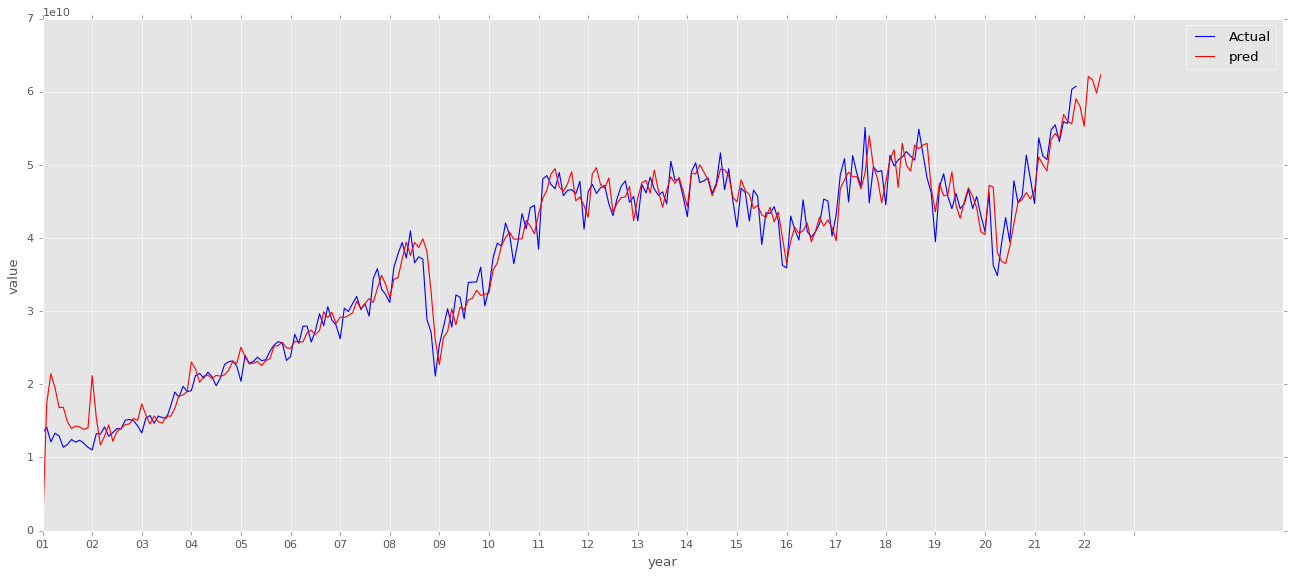

In [147]:
plt.style.use(['ggplot'])
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))
plt.xlabel('year')
plt.ylabel('value')
plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264], 
           ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22'])

In [146]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_train['real'], pred_now['pred'])**0.5
RMSE 

2766237963.036723

In [64]:
pred.to_csv('pred.csv')